In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

/var/folders/f_/s4dspcvs4rq5mkttbds1k9680000gn/T/ipykernel_90900/3826574259.py:72: RuntimeWarning: overflow encountered in multiply
  F = U_prime_list[k] * V_prime_list[k] - y
/var/folders/f_/s4dspcvs4rq5mkttbds1k9680000gn/T/ipykernel_90900/3826574259.py:113: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x_vals_neg, 1/x_vals_neg, color='darkgreen', linewidth=1., label='All global minimizers', zorder=1, linestyle='dashed')
/var/folders/f_/s4dspcvs4rq5mkttbds1k9680000gn/T/ipykernel_90900/3826574259.py:114: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x_vals_pos, 1/x_vals_pos, color='darkgreen', linewidth=1., zorder=1, linestyle='dashed')


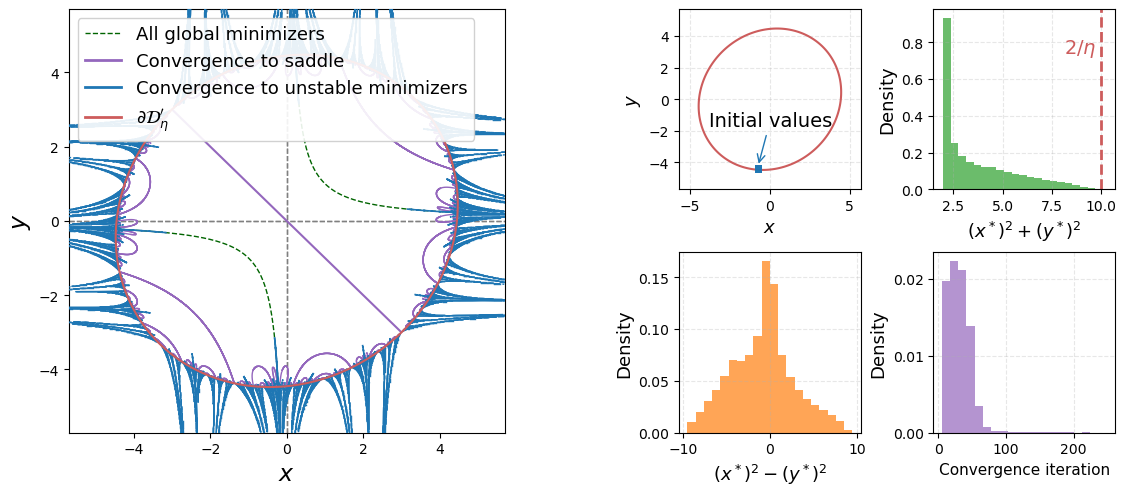

In [2]:
fig, axs = plt.subplots(
    1, 2, 
    figsize=(13.5, 5.5), 
    gridspec_kw={'width_ratios': [1, 1.], 'wspace': 0.4}  
)

ax=axs[0]
FS = 15

y = 1.
h = 0.2


ax.axhline(0, color='gray', linestyle='--', linewidth=1, zorder=0)
ax.axvline(0, color='gray', linestyle='--', linewidth=1, zorder=0)


def GD(u, v, h, y):
    z = u * v - y
    u_new = u - h * z * v
    v_new = v - h * z * u
    return u_new, v_new


bry = 4.5
Step = 6
u = np.linspace(-bry-1.2, bry+1.2, 800)
v = np.linspace(-bry-1.2, bry+1.2, 800)
U, V = np.meshgrid(u, v)
U_prime = U.copy()
V_prime = V.copy()


U_prime_list, V_prime_list = [U_prime], [V_prime]
for _ in range(Step):
    U_prime, V_prime = GD(U_prime, V_prime, h, y)
    U_prime_list.append(U_prime)
    V_prime_list.append(V_prime)


x_vals = np.linspace(-bry-1, bry+1, 800)
y_vals = -x_vals
mask = x_vals**2 + y_vals**2 + np.sqrt((x_vals**2 + y_vals**2)**2 - 16*y*(x_vals*y_vals - y)) <= 8/h
ax.plot(x_vals[mask], y_vals[mask], color='tab:purple', linewidth=1.5, zorder=2)

for k in range(Step+1):
    E = U_prime_list[k] + V_prime_list[k]
    contour_set = ax.contour(U, V, E, levels=[0], colors='none', linewidths=0)
    pathlist = [path.vertices for collection in contour_set.collections for path in collection.get_paths()] 
    for pointlist in pathlist:
        truelist = []
        for point in pointlist:
            uu,vv= point
            if uu**2+vv**2 + np.sqrt((uu**2+vv**2)**2 - 16*y*(uu*vv - y)) <= 8/h:
                truelist.append(point)
        if len(truelist)>0:
            current_group = []
            for i, point in enumerate(truelist):
                if i == 0:
                    current_group = [point]
                else:
                    prev_point = truelist[i - 1]
                    if abs(point[0] - prev_point[0]) + abs(point[1] - prev_point[1]) < 0.018:
                        current_group.append(point)
                    else:
                        current_group = np.array(current_group)
                        ax.plot(current_group[:,0], current_group[:,1], color='tab:purple', lw=1., zorder=2)
                        current_group = [point]


for k in range(Step+1):
    F = U_prime_list[k] * V_prime_list[k] - y
    contour_set = ax.contour(U, V, F, levels=[0], colors='none', linewidths=0)
    pathlist = [path.vertices for collection in contour_set.collections for path in collection.get_paths()] 
    for pointlist in pathlist:
        truelist = []
        for point in pointlist:
            uu,vv= point
            for _ in range(Step):
                uu,vv = GD(uu, vv, h, y)
            if uu**2+vv**2 >= 2/h:
                truelist.append(point)


        if k <= 2:
            lw = 1.2
            distance = 0.02
        else:
            lw = 1.
            distance = 0.015

        if len(truelist)>0:
            current_group = []
            for i, point in enumerate(truelist):
                if i == 0:
                    current_group = [point]
                else:
                    prev_point = truelist[i - 1]
                    if abs(point[0] - prev_point[0]) + abs(point[1] - prev_point[1]) < distance: #0.015
                        current_group.append(point)
                    else:
                        current_group = np.array(current_group)
                        ax.plot(current_group[:,0], current_group[:,1], color='tab:blue', lw=lw, zorder=4)
                        current_group = [point]


Q = U**2 + V**2 + np.sqrt((U**2 + V**2)**2 - 16*y*(U*V - y))
ax.contour(U, V, Q, levels=[8/h], colors='indianred', linewidths=1.5, linestyles='solid', zorder=5)

# all minima
x_vals_neg = np.linspace(-bry-1, 0, 500)
x_vals_pos = np.linspace(0, bry+1, 500)
ax.plot(x_vals_neg, 1/x_vals_neg, color='darkgreen', linewidth=1., label='All global minimizers', zorder=1, linestyle='dashed')
ax.plot(x_vals_pos, 1/x_vals_pos, color='darkgreen', linewidth=1., zorder=1, linestyle='dashed')

ax.set_xlim(-bry-1.2, bry+1.2)
ax.set_ylim(-bry-1.2, bry+1.2)

ax.set_xlabel(r'$x$', fontsize=FS+2)
ax.set_ylabel(r'$y$', fontsize=FS+2)
ax.legend(fontsize=FS-2, loc='upper left')

contour_legend = Line2D([0], [0], color='indianred', linewidth=2, linestyle='solid', label='Convergence boundary', zorder=100)
saddle_legend = Line2D([0], [0], color='tab:purple', linewidth=2, linestyle='solid', label='Convergence to Saddle', zorder=100)
instable_legend = Line2D([0], [0], color='tab:blue', linewidth=2, linestyle='solid', label='Convergence to Instable Minimizer', zorder=100)

# Add the custom legends to the main axis
legend = ax.legend(
    handles=ax.get_legend_handles_labels()[0] + [saddle_legend, instable_legend, contour_legend],
    labels=ax.get_legend_handles_labels()[1] + [
        'Convergence to saddle',
        'Convergence to unstable minimizers',
        r'$\partial  \mathcal{D}_{\eta}^{\prime}$'
    ],  
    fontsize=FS-2, loc='upper left'
)
legend.get_frame().set_alpha(0.9)




###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################




FS = 11


from matplotlib.gridspec import GridSpec


gs = GridSpec(2, 2, left=axs[1].get_position(fig).x0, 
              right=axs[1].get_position(fig).x1, 
              bottom=axs[1].get_position(fig).y0, 
              top=axs[1].get_position(fig).y1, 
              wspace=0.4, hspace=0.35, figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
axs[1].set_visible(False)




y = 1.
h = 0.2
ax.axhline(0, color='gray', linestyle='--', linewidth=1, zorder=0)
ax.axvline(0, color='gray', linestyle='--', linewidth=1, zorder=0)
bry = 4.5
Step = 6
u = np.linspace(-bry-1.2, bry+1.2, 800)
v = np.linspace(-bry-1.2, bry+1.2, 800)
U, V = np.meshgrid(u, v)
Q = U**2 + V**2 + np.sqrt((U**2 + V**2)**2 - 16*y*(U*V - y))
ax00.contour(U, V, Q, levels=[8/h], colors='indianred', linewidths=1.5, linestyles='solid', zorder=5)


xx1,xx2=-.75-0.15, -.75+0.15
yy1,yy2=-4.4-0.15, -4.4+0.15


cor1_zoom = np.linspace(xx1, xx2, 400)
cor2_zoom = np.linspace(yy1, yy2, 400)
U,V = np.meshgrid(cor1_zoom, cor2_zoom)
ax00.scatter(U, V, color='tab:blue', s=.01, alpha=1.0, zorder=6)
ax00.annotate("Initial values", xy=((xx1+xx2)/2, yy2), xytext=(-35.5, 33), textcoords='offset points',
              ha='left', va='center', fontsize=14, arrowprops=dict(arrowstyle='->', lw=1.0, color='tab:blue'))
ax00.set_xlabel(r'$x$', fontsize=FS+2)
ax00.set_ylabel(r'$y$', fontsize=FS+2)

converged_points = []
converged_norms = []
converged_iters = []
converged_frob = []

max_iters = 250

for cor1 in cor1_zoom:
    for cor2 in cor2_zoom:
        u = cor1
        v = cor2
        for it in range(max_iters):
            graduv = (u*v - y) * v, (u*v - y) * u
            u -= h * graduv[0]
            v -= h * graduv[1]
            if abs(u * v - y) < 1e-8:
                converged_points.append([u, v])
                converged_norms.append( (u**2 + v**2))
                converged_frob.append( u**2 - v**2 )
                converged_iters.append(it+1)
                break
            if abs(u * v - y) > 100:
                break


converged_points = np.array(converged_points)
converged_norms = np.array(converged_norms)
converged_frob = np.array(converged_frob)
converged_iters = np.array(converged_iters)

# 0,1: histogram of norms
ax01.hist(converged_norms, bins=20, color='tab:green', alpha=0.7, density=True)
#ax01.set_title('Norms')
ax01.set_xlabel(r'$(x^*)^2 + (y^*)^2$', fontsize=FS+2)
ax01.set_ylabel('Density', fontsize=FS+2)
ax01.set_xlim( min(converged_norms)-0.5, max(converged_norms)+1 )
ax01.axvline(2/h, color='indianred', linestyle='dashed', linewidth=2)
ax01.annotate(r'$2/\eta$', xy=(2/h, ax01.get_ylim()[1]), xytext=(-27, -20), textcoords='offset points',
              ha='left', va='top', color='indianred', fontsize=14)



# 1,0: histogram of |uu^T - vv^T|_F
ax10.hist(converged_frob, bins=20, color='tab:orange', alpha=0.7, density=True)
#ax10.set_title(r'Imbalance')
ax10.set_xlabel(r'$(x^*)^2 - (y^*)^2$', fontsize=FS+2)
ax10.set_ylabel('Density', fontsize=FS+2)
#ax10.set_aspect('equal')


# 1,1: histogram of iterations
ax11.hist(converged_iters, bins=20, color='tab:purple', alpha=0.7, density=True)
ax11.set_xlabel('Convergence iteration', fontsize=FS)
ax11.set_ylabel('Density', fontsize=FS+2)
#ax11.set_aspect('equal')


for ax in [ax00, ax01, ax10, ax11]:
    ax.grid(True, linestyle='--', alpha=0.3)


from matplotlib.ticker import MaxNLocator, FormatStrFormatter

for ax in [ax10, ax11]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if ax is ax11:
        ax.set_yticks([0.00,0.01, 0.02])


plt.savefig('output/sec3.1.png', bbox_inches='tight', dpi=300)